# K-means Clustering

In this this exercise, we will implement the K-means algorithm and use it
for image compression. We will first start on an example 2D dataset that
will help us gain an intuition of how the K-means algorithm works. After
that, we wil use the K-means algorithm for image compression by reducing
the number of colors that occur in an image to only those that are most
common in that image. 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

Before loading and visualizing the provided dataset, I will implement K-means from scratch. I will need three functions for that: init_centroids that randomly initializes centroids, find_closest_centroids that assigns each data point to the closest centroid, and compute_means that returns the new centroids by computing the means of the data points assigned to each centroid.

In [2]:
def init_centroids(X, K):
    m = X.shape[0]
    rand_indices = np.random.choice(m, size=K, replace=False)
    return X[rand_indices, :]

In [3]:
def find_closest_centroids(X, centroids):
    # For each training example compute the distance from K centroids 
    # and assign the centroid with the lowest distance to the example
    
    m = X.shape[0]
    K = centroids.shape[0]
    # indx[i] will contain the index of
    # of the centroid closest to example i
    indx = np.zeros(m)

    for i in range(m):
        temp = np.zeros(K)
        for j in range(K):
            temp[j] = np.sqrt(np.sum((X[i,:] - centroids[j,:]) ** 2))
        indx[i] = np.argmin(temp)

    return indx

In [4]:
def compute_means(X, indx, K):

    n = X.shape[1]
    centroids = np.zeros((K,n))

    for i in range(K):
        indices = np.where(indx == i)
        centroids[i,:] = np.mean(X[indices,:], axis=1)

    return centroids

We can now load and visualize our dataset

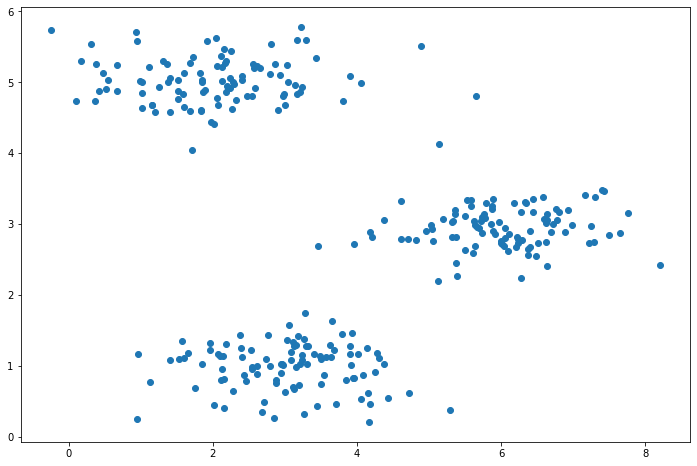

In [5]:
data = loadmat(r'C:\Users\Igor Kolasa\ML-exercises\data\ex7data2.mat')
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])

Now we will run the K-means algorithm on this dataset   

In [6]:
# Choose the number of clusters
K = 3

# Number of iterations
max_iters = 10

# Initialize centroids
centroids = init_centroids(X, K)

for i in range(max_iters):

    # For each example in X, assign it to the closest centroid
    indx = find_closest_centroids(X, centroids)

    # Given the memberships, compute new centroids
    centroids = compute_means(X, indx, K)

centroids, indx

(array([[3.04367119, 1.01541041],
        [1.95399466, 5.02557006],
        [6.03366736, 3.00052511]]),
 array([1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

And we can now visualize our cluster assignments

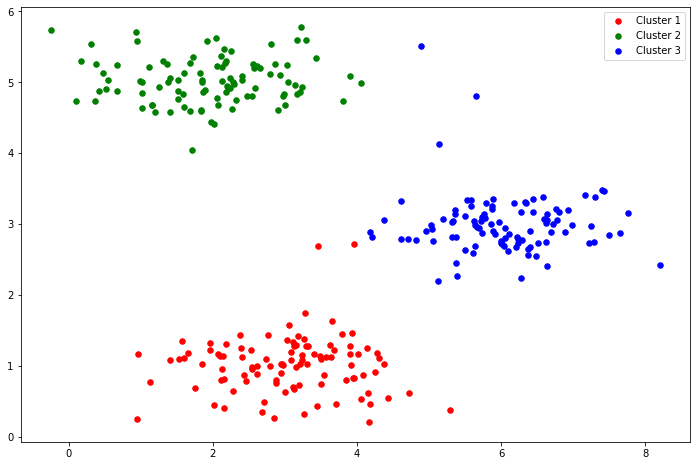

In [7]:
cluster1 = X[np.where(indx == 0)[0],:]
cluster2 = X[np.where(indx == 1)[0],:]
cluster3 = X[np.where(indx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

# Image compression with K-means

In this exercise, we will apply K-means to image compression. In a straightforward 24-bit color representation of an image,2 each pixel is repre-
sented as three 8-bit unsigned integers (ranging from 0 to 255) that specify
the red, green and blue intensity values. This encoding is often refered to as
the RGB encoding. Our image contains thousands of colors, and in this part
of the exercise, we will reduce the number of colors to 16 colors.
By making this reduction, it is possible to represent (compress) the photo
in an eficient way. Specifically, we only need to store the RGB values of
the 16 selected colors, and for each pixel in the image we now need to only
store the index of the color at that location (where only 4 bits are necessary
to represent 16 possibilities).
In this exercise, we will use the K-means algorithm to select the 16 colors
that will be used to represent the compressed image. Concretely, we will
treat every pixel in the original image as a data example and use the K-means
algorithm to find the 16 colors that best group (cluster) the pixels in the 3-
dimensional RGB space. Once we have computed the cluster centroids on
the image, we will then use the 16 colors to replace the pixels in the original
image.


Load and display provided image

[[[219 180 103]
  [230 185 116]
  [226 186 110]
  ...
  [ 14  15  13]
  [ 13  15  12]
  [ 12  14  12]]

 [[230 193 119]
  [224 192 120]
  [226 192 124]
  ...
  [ 16  16  13]
  [ 14  15  10]
  [ 11  14   9]]

 [[228 191 123]
  [228 191 121]
  [220 185 118]
  ...
  [ 14  16  13]
  [ 13  13  11]
  [ 11  15  10]]

 ...

 [[ 15  18  16]
  [ 18  21  18]
  [ 18  19  16]
  ...
  [ 81  45  45]
  [ 70  43  35]
  [ 72  51  43]]

 [[ 16  17  17]
  [ 17  18  19]
  [ 20  19  20]
  ...
  [ 80  38  40]
  [ 68  39  40]
  [ 59  43  42]]

 [[ 15  19  19]
  [ 20  20  18]
  [ 18  19  17]
  ...
  [ 65  43  39]
  [ 58  37  38]
  [ 52  39  34]]]


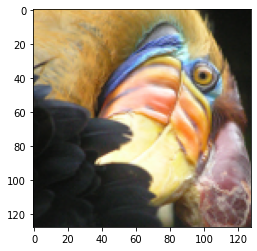

In [8]:
data = loadmat(r'C:\Users\Igor Kolasa\ML-exercises\data\bird_small.mat')
A = data['A']
print(A)
plt.imshow(A)

Now we'll run our k-means clustering on pixels from an image.

In [9]:
# Divide by 255 so that all values are in the range 0
A = A / 255

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, (A.shape[0]*A.shape[1], 3))

# Set up hyper-parameters
K = 16
max_iters = 10

centroids = init_centroids(X, K)

for i in range(max_iters):

    # For each example in X, assign it to the closest centroid
    indx = find_closest_centroids(X, centroids)

    # Given the memberships, compute new centroids
    centroids = compute_means(X, indx, K)

centroids, indx

(array([[0.55416221, 0.46783422, 0.42209447],
        [0.81377243, 0.57982523, 0.27862637],
        [0.64686627, 0.46930609, 0.20530234],
        [0.86573781, 0.70237764, 0.43249397],
        [0.07858367, 0.08510337, 0.07466362],
        [0.22789486, 0.21921165, 0.21761955],
        [0.48533817, 0.37160764, 0.26227189],
        [0.98238956, 0.94416259, 0.80370185],
        [0.77051938, 0.68481365, 0.60542434],
        [0.38374398, 0.28082553, 0.20076977],
        [0.49304238, 0.60246679, 0.78507274],
        [0.33277436, 0.36259225, 0.44559151],
        [0.67081077, 0.58744594, 0.48747113],
        [0.80550048, 0.78318279, 0.8019975 ],
        [0.95761418, 0.84249149, 0.61165903],
        [0.13588919, 0.14273598, 0.13379161]]),
 array([ 3.,  3.,  3., ...,  5., 15., 15.]))

In this part we will use the clusters of K-Means to compress an image

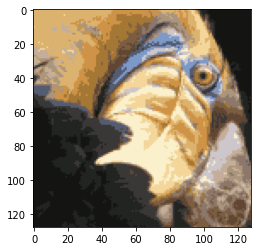

In [10]:
# Find closest cluster members
indx = find_closest_centroids(X, centroids)

# Essentially, now we have represented the image X 
# as in terms of the indices in indx.

# We can now recover the image from the indices (indx) by mapping each # pixel (specified by its index in indx) to the centroid value
X_recovered = centroids[indx.astype(int),:]

# Reshape the recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], 3))

# Display compressed image
plt.imshow(X_recovered)

# Principal Component Analysis

In this exercise, we will use principal component analysis (PCA) to perform
dimensionality reduction. We will first experiment with an example 2D
dataset to get intuition on how PCA works, and then use it on a bigger
dataset of 5000 face image dataset.


In this part of the
exercise, we will visualize what happens when you use PCA to reduce the
data from 2D to 1D. In practice, you might want to reduce data from 256 to
50 dimensions, say; but using lower dimensional data in this example allows
us to visualize the algorithms better.
Let's load and plot our original dataset.

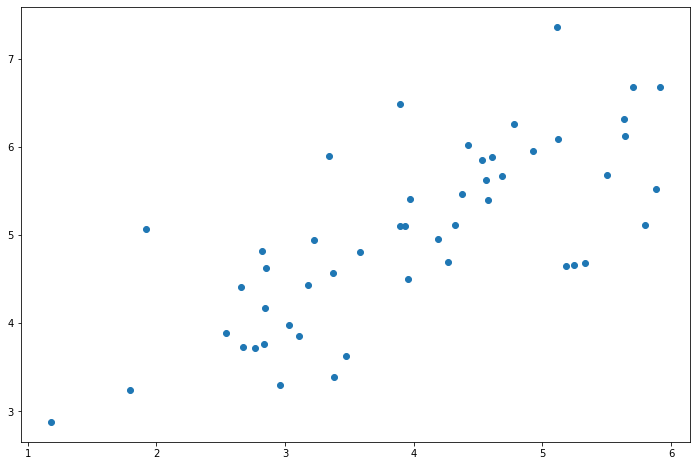

In [3]:
data = loadmat(r'C:\Users\Igor Kolasa\ML-exercises\data\ex7data1.mat')
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])

We will now implement PCA. 
Before running PCA, it is important to first normalize X, so we start with implementing function feature_normalize.

In [8]:
def feature_normalize(X):

    return (X - X.mean()) / X.std()

Now we move on to pca function implementaion, it should compute prinicipal components of variation in the data. That means our function will compute eigenvectors of the covariance matrix of X. 

In [6]:
def pca(X):

    # number of training examples
    m = X.shape[0]

    # We first compute the covariance matrix
    Sigma = np.dot(X.T, X) / m

    # Use numpy built-in svd function to compute
    # eigenvectors U 
    U, _, _ = np.linalg.svd(Sigma)

    return U

Let's run our PCA on normalized dataset to check if it works correctly.

In [10]:
X_norm = feature_normalize(X)
U = pca(X_norm)
U

array([[-0.79241747, -0.60997914],
       [-0.60997914,  0.79241747]])

After computing the principal components, we can now use them to to reduce the feature dimension of our dataset by projecting each example onto a lower dimensional space, x(i) -> z(i) (e.g. projecting the data from 2D to 1D). In
this part of the exercise, we will use the eigenvectors returned by PCA and
project the example dataset into a 1-dimensional space.
project_data function computes the projection of 
the normalized inputs X into the reduced dimensional space spanned by
the first K columns of U. It returns the projected examples in Z.


In [11]:
def project_data(X, U, K):

    U_reduce = U[:,:K]
    return np.dot(X, U_reduce)

In [13]:
K = 1
Z = project_data(X_norm, U, K)
X.shape, Z.shape

((50, 2), (50, 1))

As we can see from the output above, we managed to succesfully reduce dimension of our data. After projecting the data onto the lower dimensional space, we can approximately recover the data by projecting them back onto the original high dimensional space. We will implement recover_data function for that.


In [14]:
def recover_data(Z, U, K):
    
    U_reduce = U[:,:K]
    return np.dot(Z, U_reduce.T)

In [15]:
K = 1
X_rec = recover_data(Z, U, K)
X_rec

array([[-1.0275101 , -0.79094638],
       [ 0.56288134,  0.43328913],
       [-0.99537513, -0.76620984],
       [-1.2182995 , -0.93781032],
       [-0.99075802, -0.76265573],
       [ 0.48502282,  0.37335599],
       [-0.88023821, -0.6775809 ],
       [ 1.61816653,  1.24561593],
       [-0.05403827, -0.04159703],
       [ 0.48776572,  0.37546738],
       [ 0.40340322,  0.31052767],
       [ 0.3232284 ,  0.24881151],
       [ 0.02545563,  0.01959498],
       [ 0.45739635,  0.35208996],
       [-1.16025138, -0.89312662],
       [ 1.32567037,  1.02046118],
       [ 0.56968227,  0.43852428],
       [-0.80732034, -0.62145092],
       [ 1.47404776,  1.13467764],
       [ 0.41922739,  0.32270864],
       [ 1.51170239,  1.16366304],
       [-0.35541498, -0.27358776],
       [ 1.25072368,  0.96276948],
       [-0.04373204, -0.03366361],
       [-1.2698003 , -0.97745409],
       [-0.48512981, -0.37343834],
       [ 0.81328007,  0.62603854],
       [ 0.92392445,  0.71120926],
       [-0.74748606,

We can now visualize our recovered data to see how dimension reduction and then recovering affected our dataset.

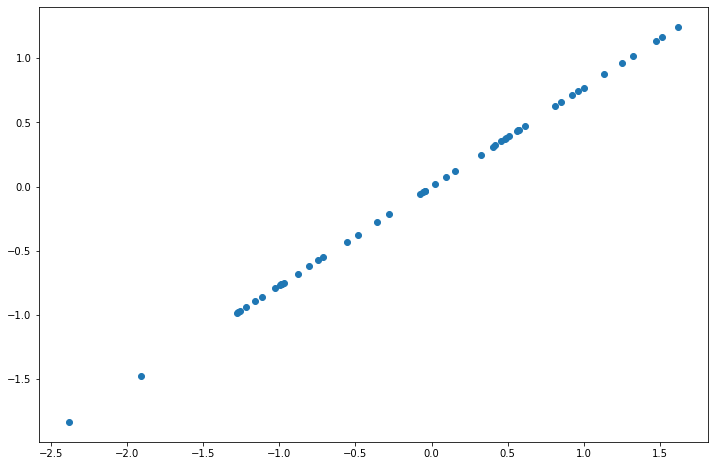

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_rec[:,0], X_rec[:,1])

We can see that all the data points are compressed down into one line. 

# Face Image Dataset

In this part of the exercise, we will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat
contains a dataset X of face images, each 32 x 32 in grayscale. Each row
of X corresponds to one face image (a row vector of length 1024). 

Let's visualize one of these faces first.


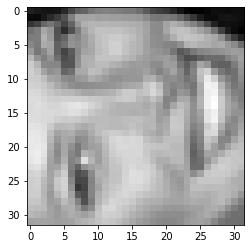

In [17]:
data = loadmat(r'C:\Users\Igor Kolasa\ML-exercises\data\ex7faces.mat')
X = data['X']

face_numb = 7
face = np.reshape(X[face_numb,:], (32, 32))
plt.imshow(face, cmap='gray')

Let's run PCA on our faces dataset. 
Notice that each principal
component in U (each row) is a vector of length n (where for the face dataset,
n = 1024). It turns out that we can visualize these principal components by
reshaping each of them into a 32 x 32 matrix that corresponds to the pixels
in the original dataset.

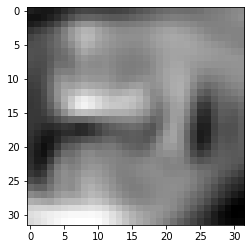

In [19]:
X_norm = feature_normalize(X)

U = pca(X_norm)

eigen_numb = 9
eigenvector_img = np.reshape(U[:, eigen_numb], (32, 32))

plt.imshow(eigenvector_img, cmap='gray')

Now we will project images to the eigen space using the top k eigenvectors - perform dimensionality reduction.

In [20]:
K = 100
Z = project_data(X_norm, U, K)
Z.shape

(5000, 100)

To understand what is lost in the dimension reduction, we can recover
the data using only the projected dataset.

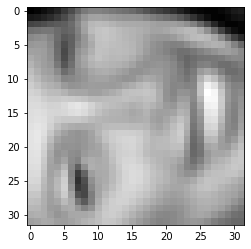

In [21]:
X_rec = recover_data(Z, U, K)

face_numb = 7
face = np.reshape(X_rec[face_numb,:], (32, 32))
plt.imshow(face, cmap='gray')

From the reconstruction, we can observe that the general structure and appearance of the face are kept while
the fine details are lost. 